<a href="https://colab.research.google.com/github/Vionarose9/PESU_I0/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importing the dataset**

In [ ]:
dataset = pd.read_csv('housing.csv')
# X = dataset.iloc[:, :].values

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dataset)
X

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

# **Applying PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X=pca.fit_transform(X)

# **Using the elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

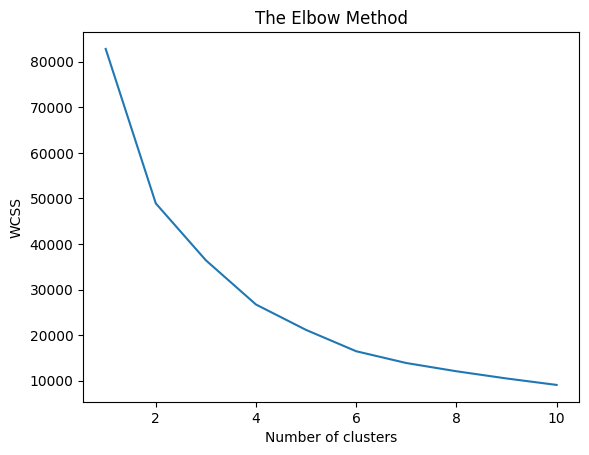

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Training the K-means model on the dataset**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

# **Visualising the clusters**

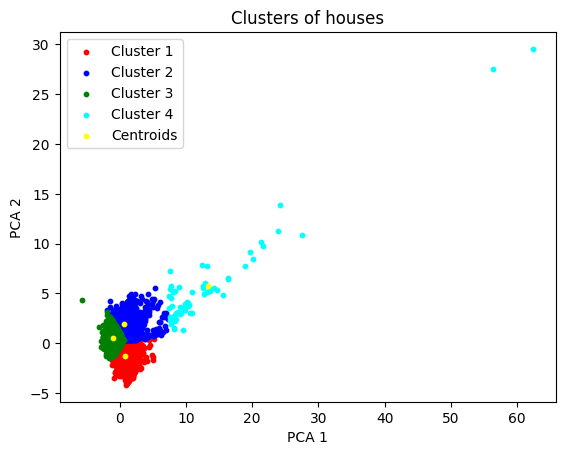

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters of houses')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()